In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler

#Normalizar datos
from sklearn.preprocessing import MinMaxScaler

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb

from sklearn.svm import SVC

#Métricas
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Importación knn
from sklearn.neighbors import KNeighborsClassifier


In [3]:
data_url= "/content/drive/MyDrive/1 Clases Universidad /2023-2/Inteligentes2/Parcial 1/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset= pd.read_csv (data_url)
df = pd.DataFrame(dataset)

In [4]:
#visualizar algunas filas del dataframe
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Cambiar NObeyesdad en un dato categorico de "yes" y "no"

In [6]:
# Crear un diccionario de mapeo
mapeo = {
    'Normal_Weight': 'no',
    'Overweight_Level_I': 'no',
    'Overweight_Level_II': 'no',
    'Obesity_Type_I': 'yes',
    'Obesity_Type_II': 'yes',
    'Obesity_Type_III': 'yes',
    'Insufficient_Weight': 'no'
}

# Aplicar el mapeo a la columna 'NObeyesdad'
df['NObeyesdad'] = df['NObeyesdad'].map(mapeo)

# Verificar que la columna se ha modificado correctamente
print(df['NObeyesdad'].unique())  # Esto mostrará ['no', 'yes']

['no' 'yes']


In [7]:
#visualizar algunas filas del dataframe con si o no
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,no
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,no
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,no
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,no
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,no
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,no


# **Limpieza de datos atipicos y sucios**

In [5]:
# comprobamos que no existan valores nulos dentro del dataset

# Verifica si hay valores nulos en cada columna
valores_nulos = df.isnull().any()

# Muestra las columnas con valores nulos (si los hubiera)
columnas_con_nulos = valores_nulos[valores_nulos == True]

# Si todas las columnas están libres de valores nulos, columnas_con_nulos estará vacío.

if columnas_con_nulos.empty:
    print("No hay valores nulos en ninguna columna.")
else:
    print("Columnas con valores nulos:")
    print(columnas_con_nulos)

No hay valores nulos en ninguna columna.


Cambiar NObeyesdad en un dato categorico de "yes" y "no"

Verificar distribuciones de probabilidad de las columnas numéricas

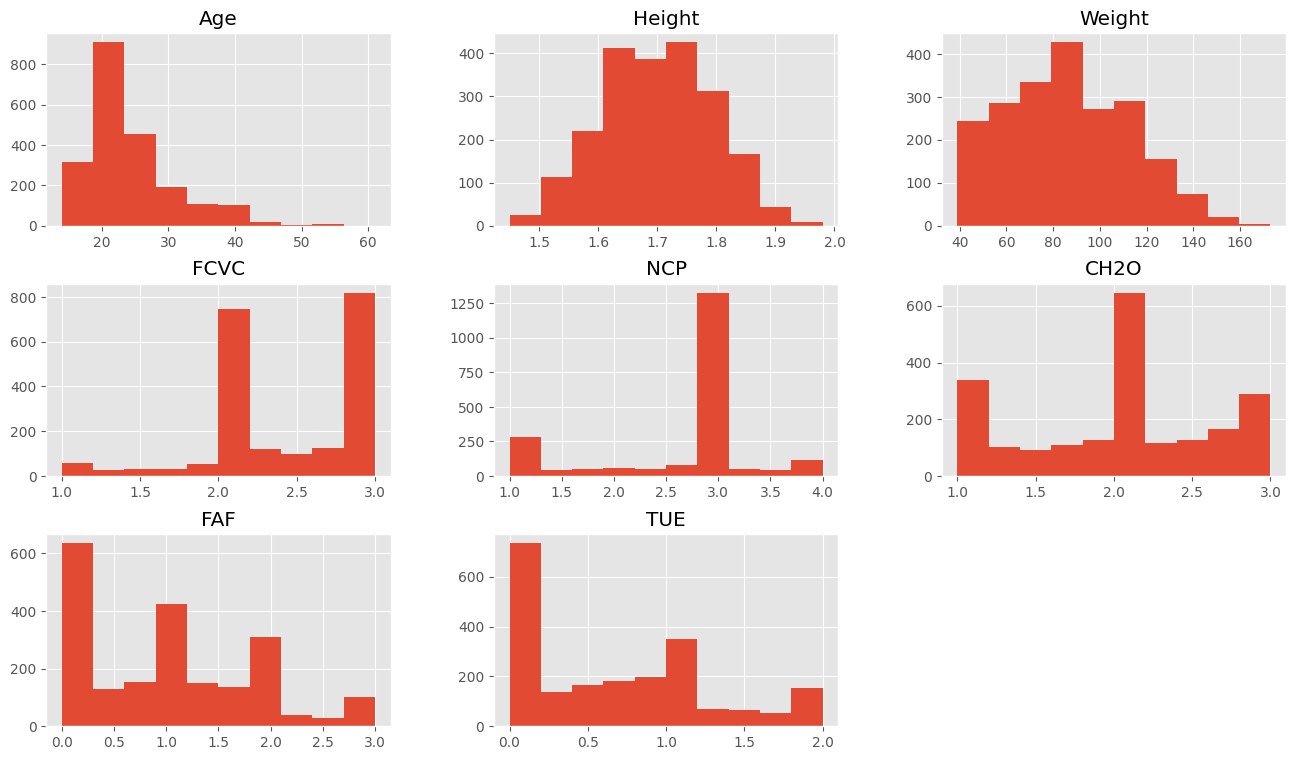

In [8]:
numerico = df.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
numerico.hist()
plt.show()

Se usará la prueba de Agostino para comprobar la distribución normal

In [9]:
# se usará la prueba de Agostino
normal=[]
noNormal=[]
for oe in numerico:
  datosColumna = numerico[oe]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(oe)
  else:
    noNormal.append(oe)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Correlación de columnas numéricas

<Axes: title={'center': 'Obesity'}>

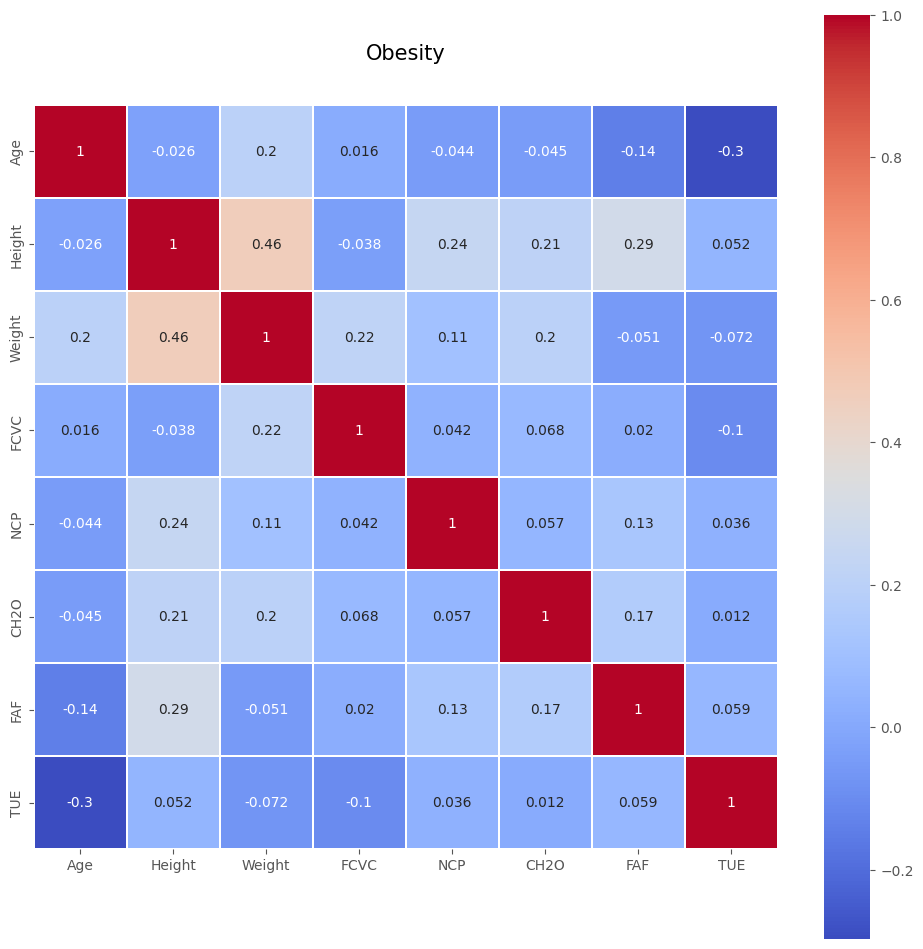

In [10]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Obesity', y=1.05, size=15)
sb.heatmap(numerico.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Histogramas de datos categoricos

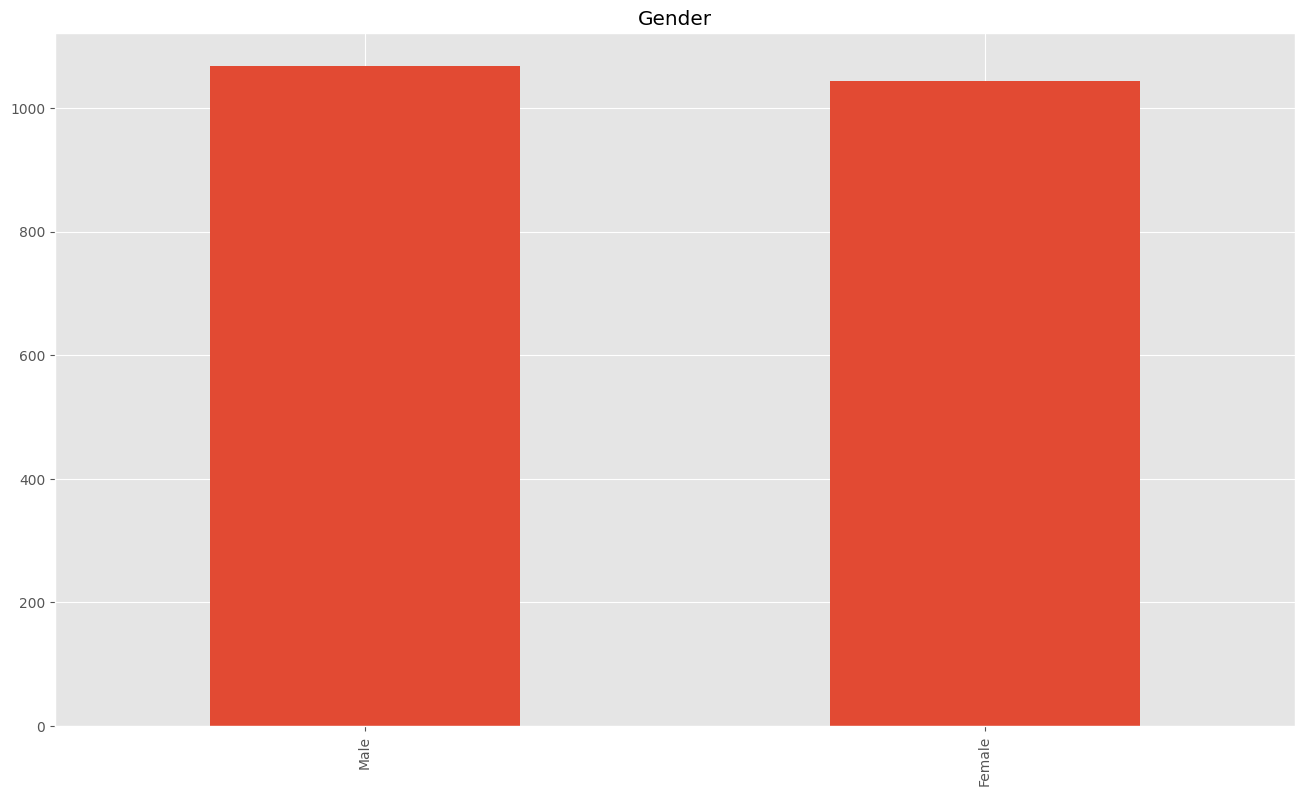

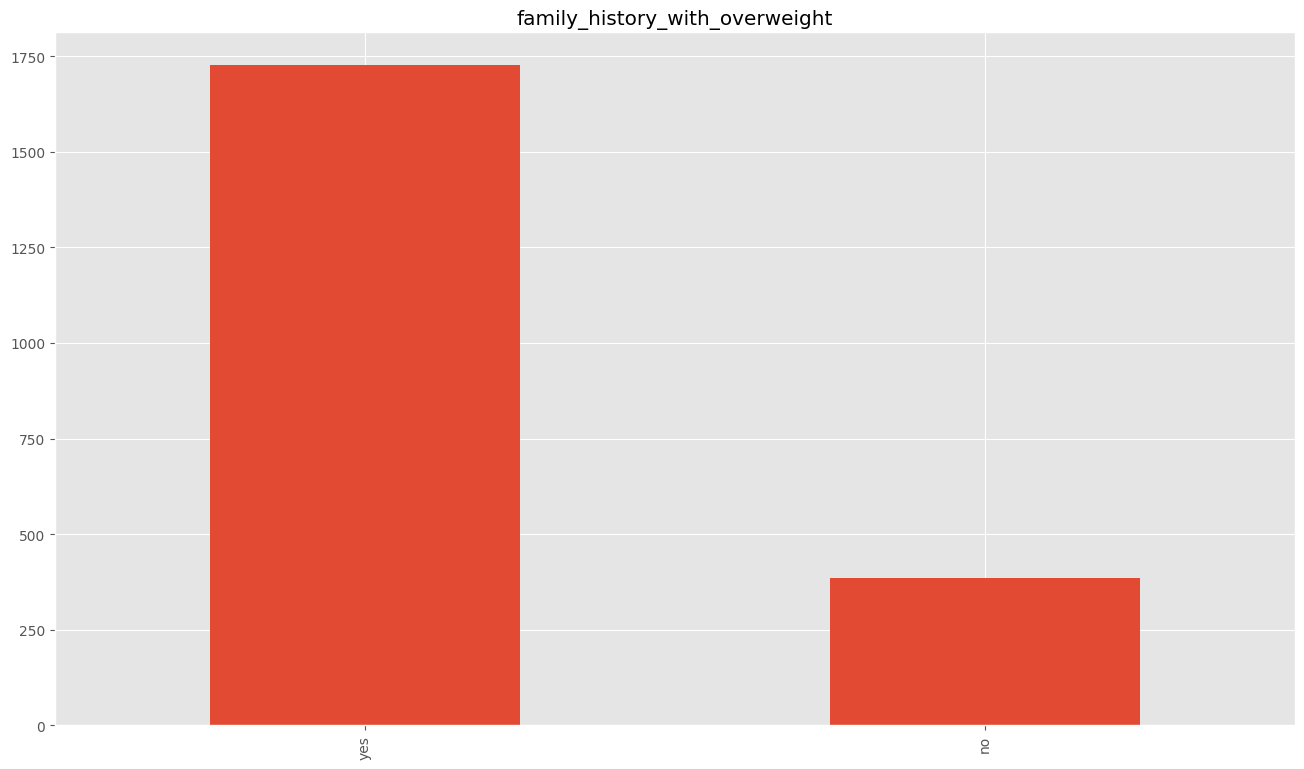

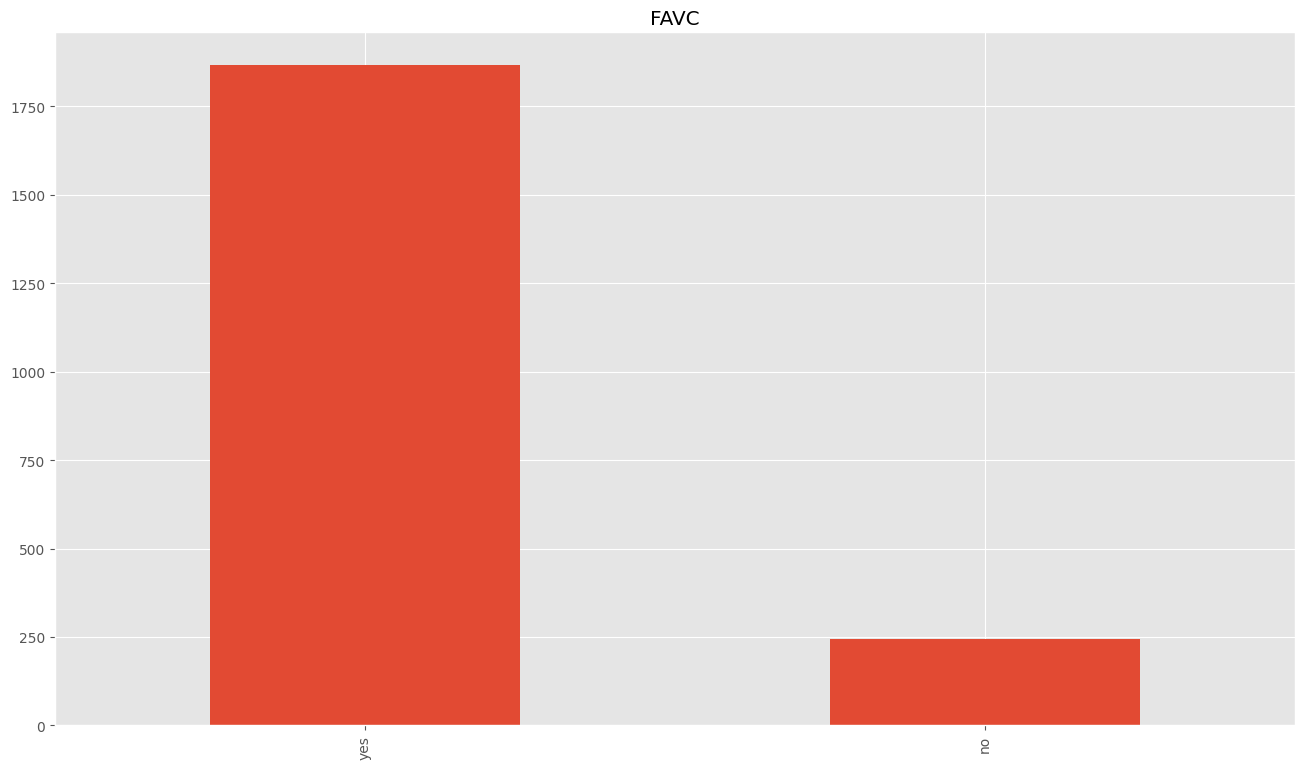

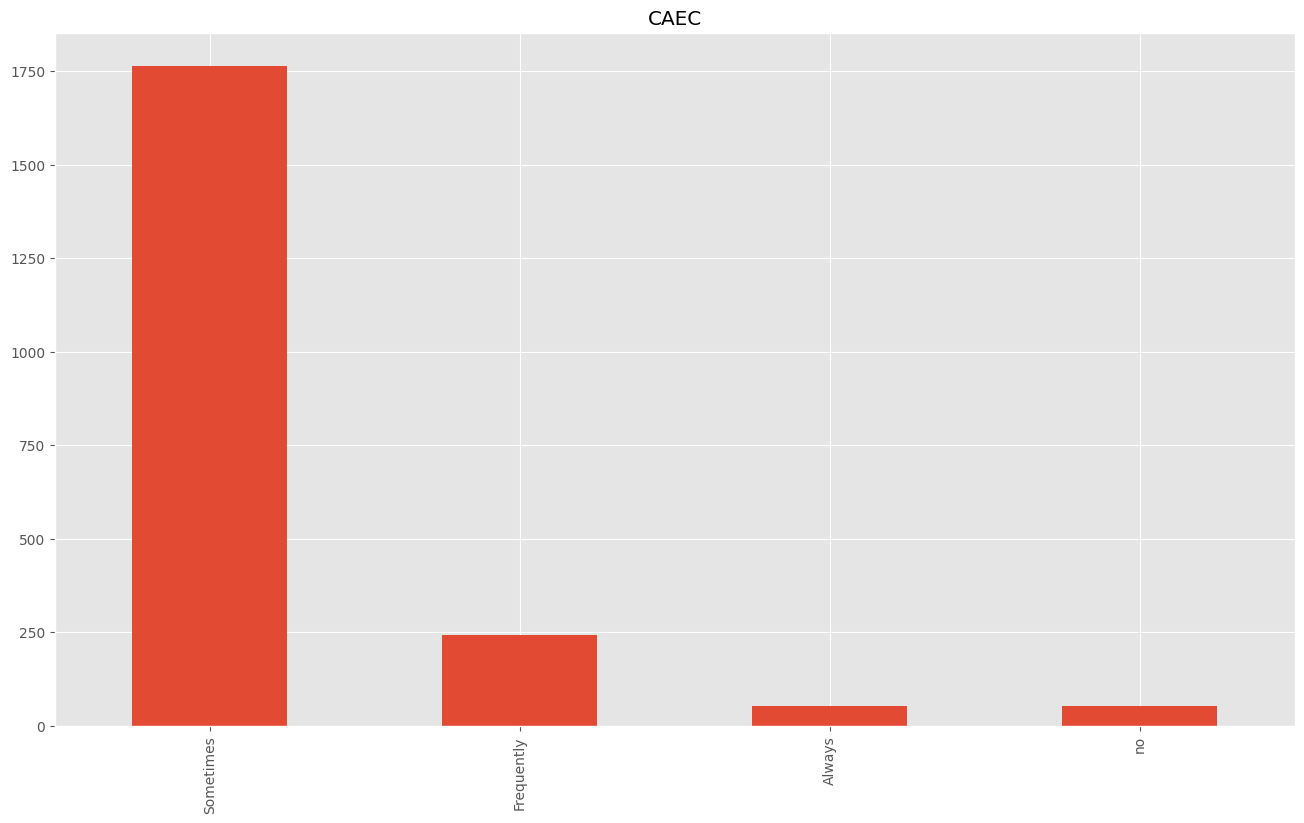

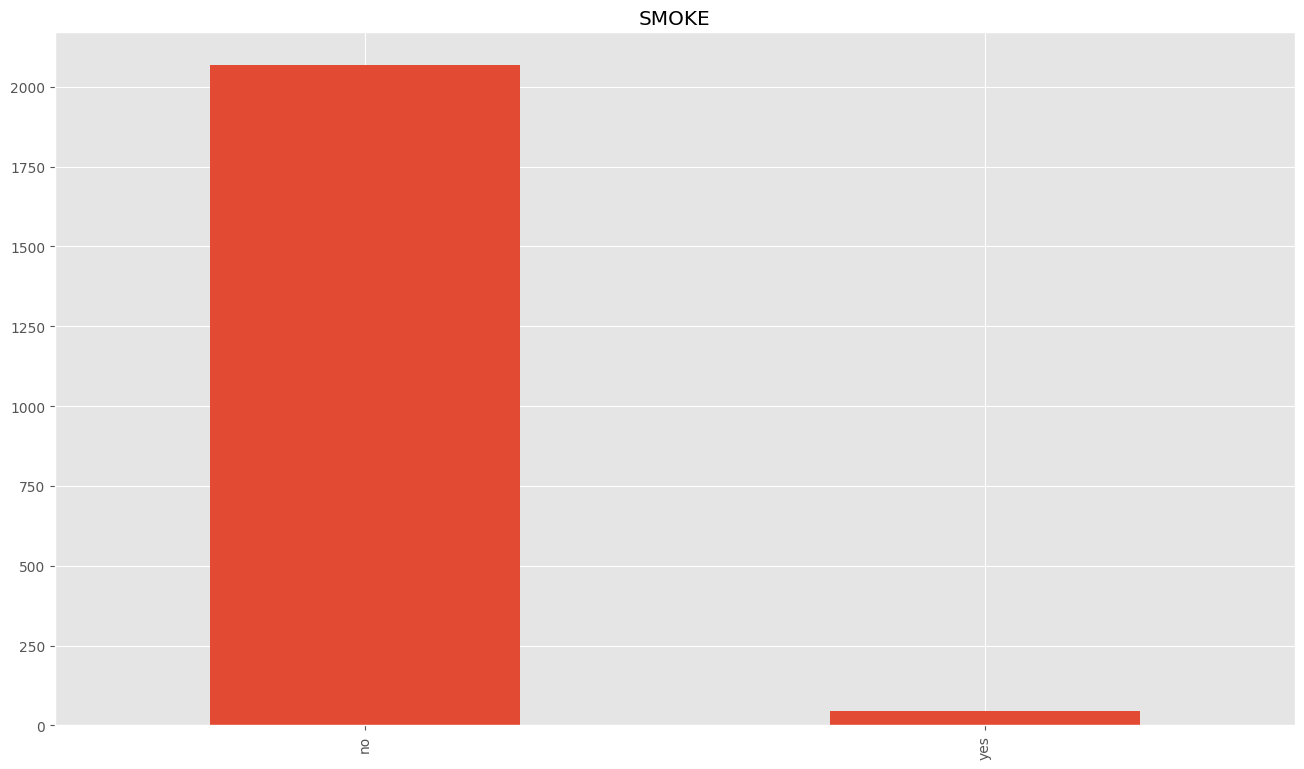

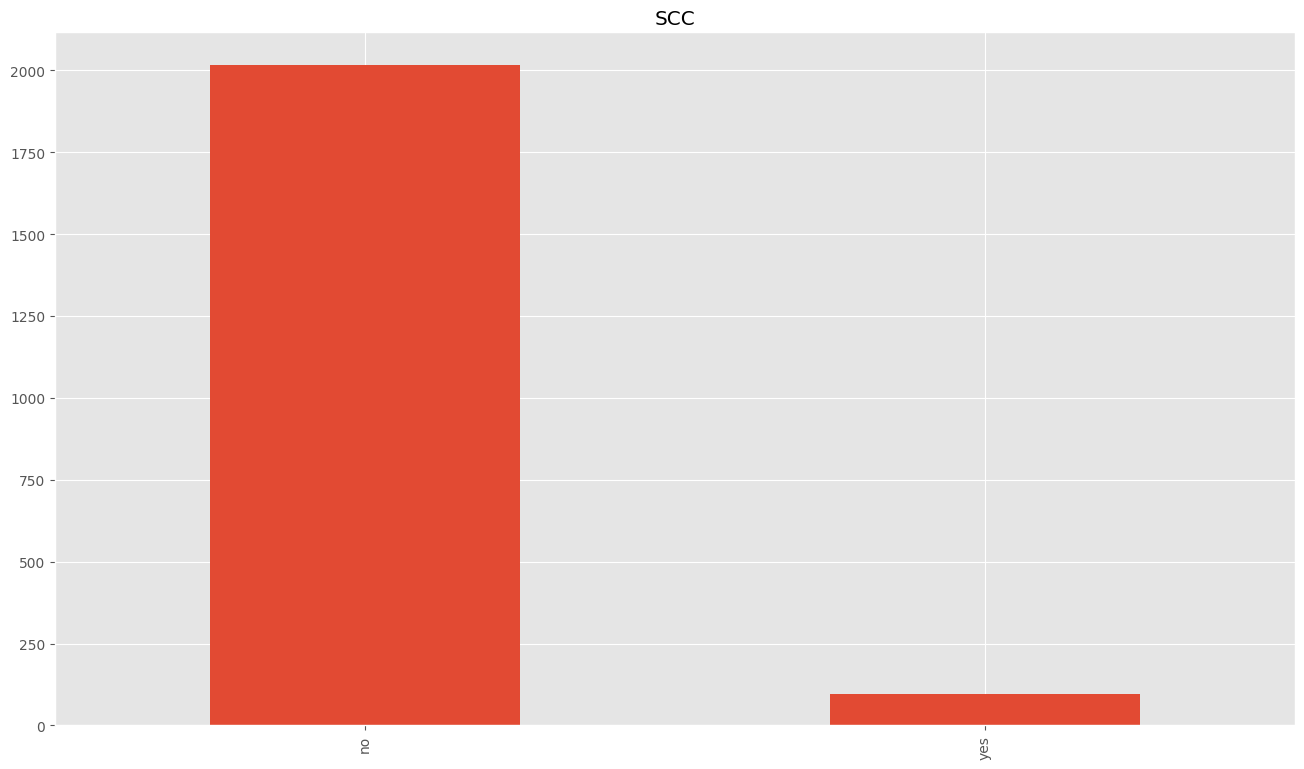

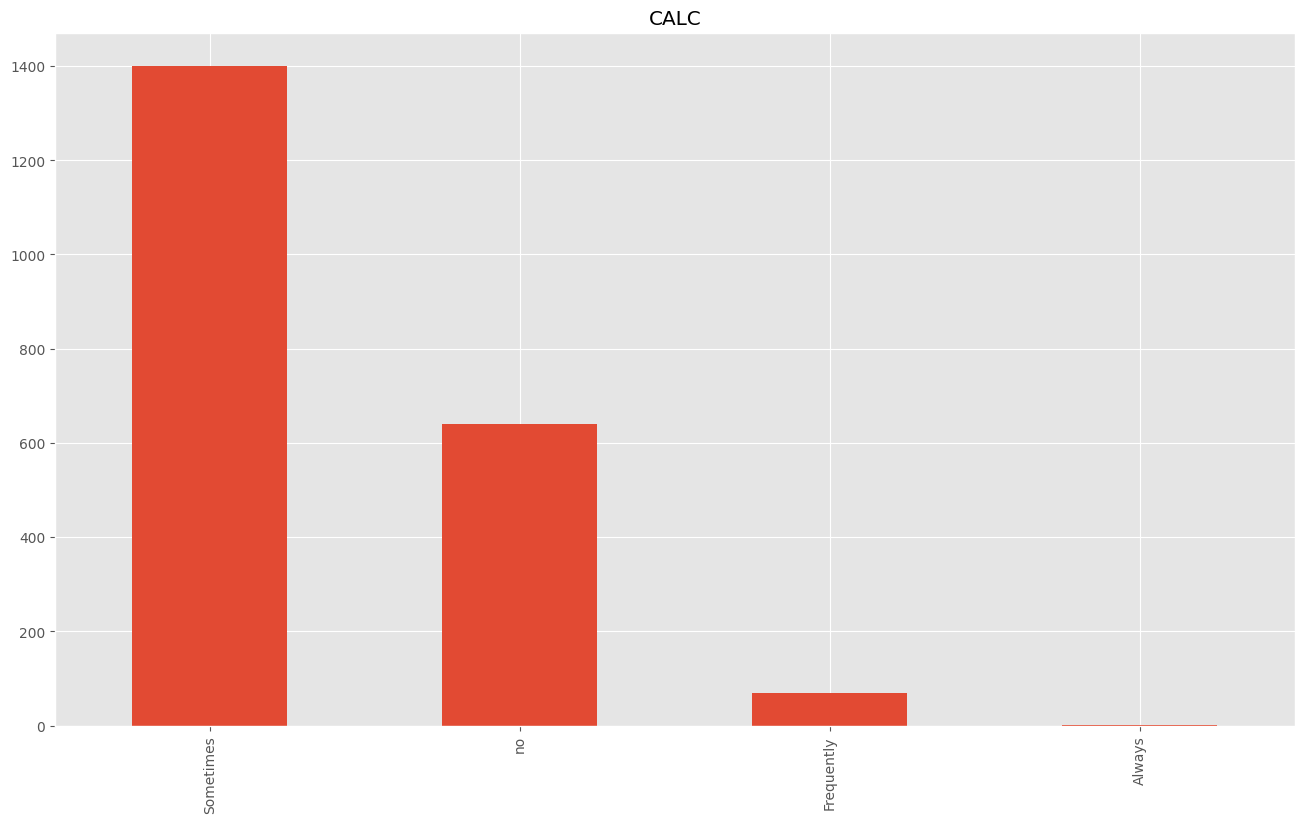

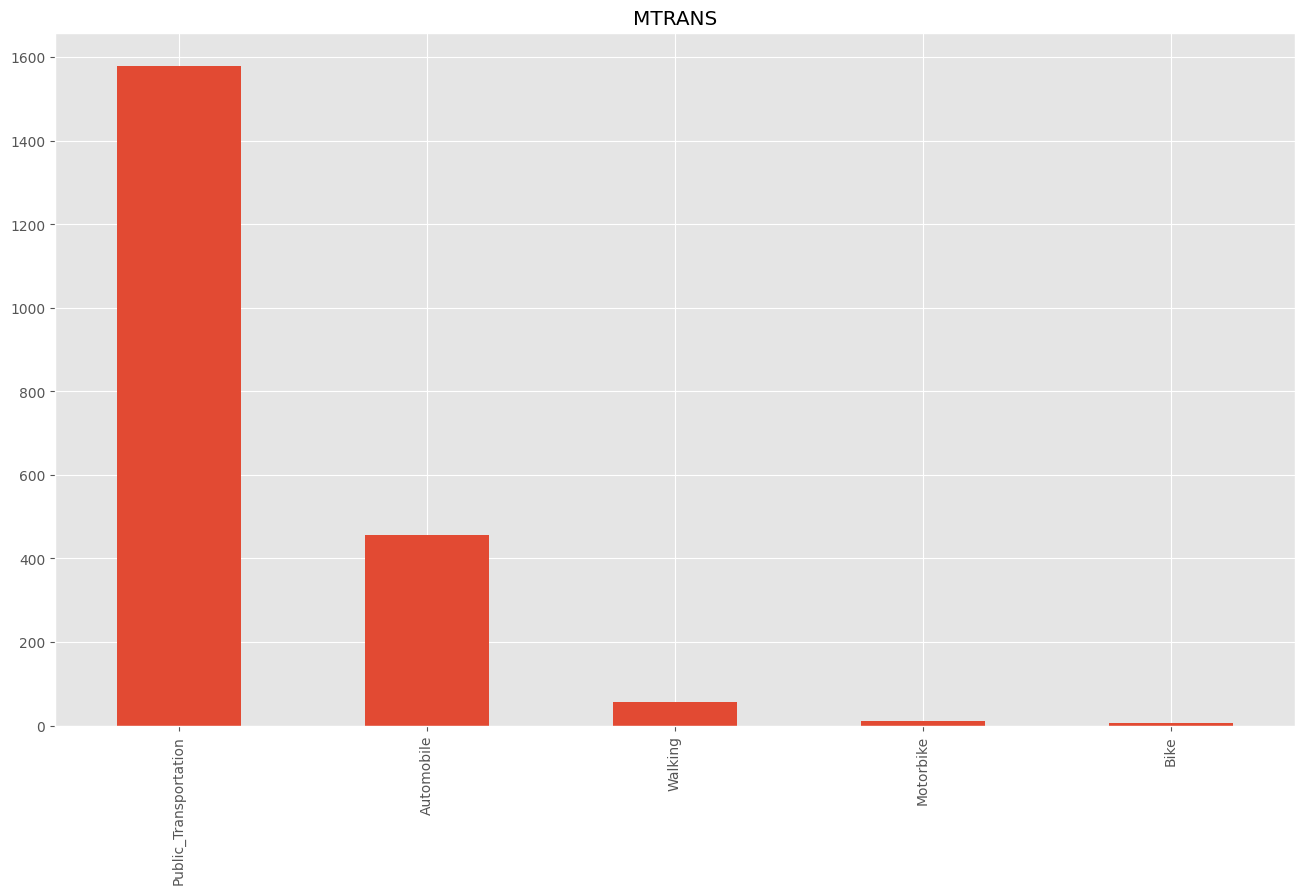

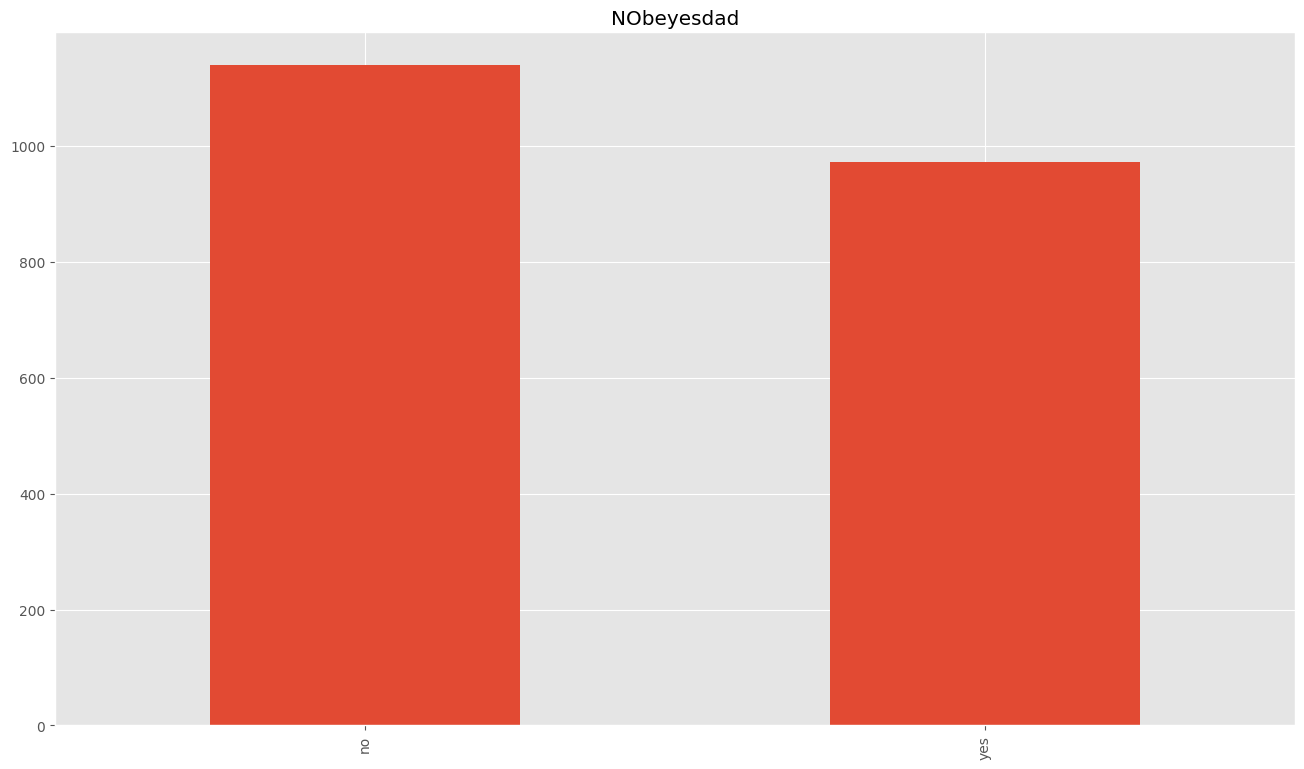

In [11]:
categoricos = [col for col in df.columns if df[col].dtype == 'object' and col!= 'y'] # obteniendo los datos categoricos

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
      fig, ax = plt.subplots()
      df[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()

Codificar los valores categoricos para que queden en números, esto con el fin de tratar mejor los datos en el algoritmo

In [12]:
encoder=LabelEncoder()
cat_colsAll = [col for col in df.columns if df[col].dtype == 'object']
# encodificar
for col in cat_colsAll:
        df[col] = encoder.fit_transform(df[col])

Dividir los datos

In [13]:
dataNumerica = df.select_dtypes(np.number)
dataCategorica = df.select_dtypes(object)

Normalizar

In [14]:
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)
dataNumerica2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-0.923786
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-0.923786
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-0.923786
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,-0.923786
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,-0.923786


Modificar datos numéricos

In [15]:
dataNumerica3 = dataNumerica2.round()
dataNumerica3.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.0,-1.0,-1.0,-1.0,0.0,-3.0,-1.0,0.0,0.0,-0.0,-0.0,-0.0,-1.0,1.0,1.0,1.0,-1.0
1,-1.0,-1.0,-2.0,-1.0,0.0,-3.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,-1.0,-1.0,1.0,-1.0
2,1.0,-0.0,1.0,-0.0,0.0,-3.0,-1.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,1.0,-2.0,1.0,-1.0
3,1.0,0.0,1.0,0.0,-2.0,-3.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,-1.0,-2.0,1.0,-1.0
4,1.0,-0.0,1.0,0.0,-2.0,-3.0,-1.0,-2.0,0.0,-0.0,-0.0,-0.0,-1.0,-1.0,-1.0,1.0,-1.0


In [16]:
dataNumerica4 = dataNumerica3.astype(int)
dataNumerica2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-0.923786
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-0.923786
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-0.923786
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,-0.923786
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,-0.923786


Unir los datos numéricos con los categóricos

In [17]:
df = pd.concat([dataNumerica4,dataCategorica], axis = 1) #unir los datos numéricos
df.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1,-1,-1,-1,0,-3,-1,0,0,0,0,0,-1,1,1,1,-1
1,-1,-1,-2,-1,0,-3,1,0,0,7,2,5,2,-1,-1,1,-1
2,1,0,1,0,0,-3,-1,0,0,0,0,0,1,1,-2,1,-1
3,1,0,1,0,-2,-3,1,0,0,0,0,0,1,-1,-2,1,-1
4,1,0,1,0,-2,-3,-1,-2,0,0,0,0,-1,-1,-1,1,-1
5,1,1,-1,-1,-2,0,-1,0,0,0,0,0,-1,-1,-1,-2,-1
6,-1,0,-2,-1,0,0,1,0,0,0,0,0,0,-1,-1,0,-1
7,1,0,-1,-1,-2,-3,-1,0,0,0,0,0,2,-1,-1,1,-1
8,1,0,1,-1,0,0,1,0,0,0,0,0,0,1,-2,1,-1
9,1,0,0,-1,0,0,-1,0,0,0,0,0,0,1,1,1,-1


Datos normalizados y modificicados

In [18]:
df.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1,-1,-1,-1,0,-3,-1,0,0,0,0,0,-1,1,1,1,-1
1,-1,-1,-2,-1,0,-3,1,0,0,7,2,5,2,-1,-1,1,-1
2,1,0,1,0,0,-3,-1,0,0,0,0,0,1,1,-2,1,-1
3,1,0,1,0,-2,-3,1,0,0,0,0,0,1,-1,-2,1,-1
4,1,0,1,0,-2,-3,-1,-2,0,0,0,0,-1,-1,-1,1,-1
5,1,1,-1,-1,-2,0,-1,0,0,0,0,0,-1,-1,-1,-2,-1
6,-1,0,-2,-1,0,0,1,0,0,0,0,0,0,-1,-1,0,-1
7,1,0,-1,-1,-2,-3,-1,0,0,0,0,0,2,-1,-1,1,-1
8,1,0,1,-1,0,0,1,0,0,0,0,0,0,1,-2,1,-1
9,1,0,0,-1,0,0,-1,0,0,0,0,0,0,1,1,1,-1


Asignación de variables para X y Y

In [19]:
X=df.drop(["NObeyesdad"],axis=1) # obtener valores de x
y=df["NObeyesdad"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(2111, 16)
      Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0         -1   -1      -1      -1                               0    -3    -1   
1         -1   -1      -2      -1                               0    -3     1   
2          1    0       1       0                               0    -3    -1   
3          1    0       1       0                              -2    -3     1   
4          1    0       1       0                              -2    -3    -1   
...      ...  ...     ...     ...                             ...   ...   ...   
2106      -1   -1       0       2                               0     0     1   
2107      -1    0       1       2                               0     0     1   
2108      -1    0       1       2                               0     0     1   
2109      -1    0       0       2                               0     0     1   
2110      -1    0       0       2                               0     0     1   

      NCP  CAEC 

Buscar el mejor valor de suavizado para reducir o eliminar overfitting y underfitting

In [20]:
# definimos el modelo
modelo = GaussianNB()

# valores de probar
alphas = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# obtener el mejor valor por validación cruzada
grid = GridSearchCV(estimator=modelo, param_grid=alphas, cv=5)

# ajustamos el modelo a los datos
grid.fit(X, y)

print(f"El mejor valor de var_smoothing es: {grid.best_params_['var_smoothing']}")
print(f'Precisión media en validación cruzada: {grid.best_score_}')

El mejor valor de var_smoothing es: 1e-09
Precisión media en validación cruzada: 0.7787749431391662


Selección de caracteristicas

#IMPLEMENTACIÓN ALGORITMO MSV

PARTICIÓN DE DATOS 80% 20%

In [21]:
XTrainNaive,XTestNaive,yTrainNaive,yTestNaive=train_test_split(X,y,test_size=0.2, random_state=2)

In [22]:
modeloNaive=GaussianNB(var_smoothing=1e-09)
modeloNaive.fit(XTrainNaive,yTrainNaive)
yPredictNaive=modeloNaive.predict(XTestNaive)
print(yPredictNaive)

[ 1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1
 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1
 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1
  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1
  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1
 -1  1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1
 -1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1
  1  1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1
  1  1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1
  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1  1

Identificar overfitting o underfitting del modelousando Vaidación Cruzada

In [23]:
scores = cross_val_score(modeloNaive, X, y, cv=5)

# calcular la media y la desviación estándar de las puntuaciones de precisión
meanScore = np.mean(scores)
stdScore = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
yPredTrain = modeloNaive.predict(XTrainNaive)
yPredTest = modeloNaive.predict(XTestNaive)

# calcular la precisión en los datos de entrenamiento y prueba
accuracyTrain = accuracy_score(yTrainNaive, yPredTrain)
accuracyTest = accuracy_score(yTestNaive, yPredTest)

print("Precisión en los datos de entrenamiento:", accuracyTrain)
print("Precisión en los datos de prueba:", accuracyTest)

# imprimir las puntuaciones de precisión y sus estadísticas
print('Puntuaciones de precisión:', scores.mean())
print('Precisión media:', meanScore)
print('Desviación estándar de la precisión:', stdScore)

Precisión en los datos de entrenamiento: 0.7677725118483413
Precisión en los datos de prueba: 0.817966903073286
Puntuaciones de precisión: 0.7787749431391662
Precisión media: 0.7787749431391662
Desviación estándar de la precisión: 0.13928437320688455


Matriz de confusión

[[141  69]
 [  8 205]]


<Axes: >

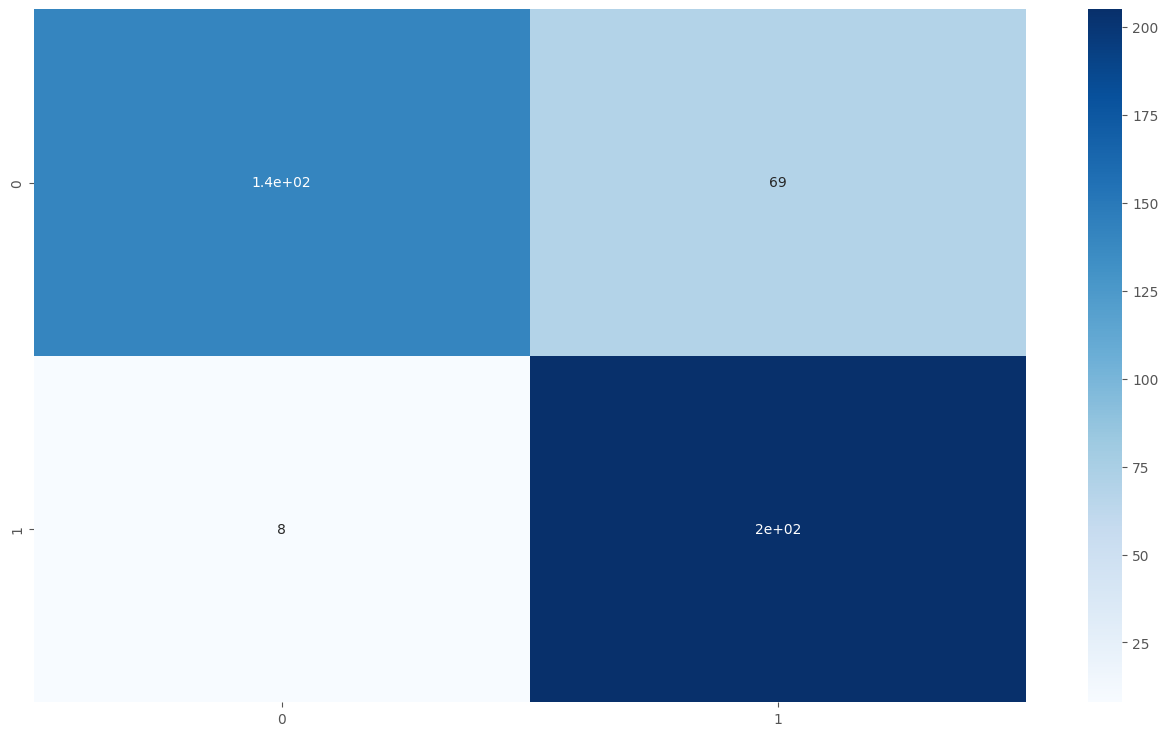

In [24]:
matrizNaive=confusion_matrix(yTestNaive,yPredictNaive)
print(matrizNaive)
sb.heatmap(matrizNaive,annot=True,cmap="Blues")

In [25]:
vp = matrizNaive[0,0]
fp = matrizNaive[0,1]
fn = matrizNaive[1,0]
vn = matrizNaive[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print("Verdaderos Positivos = ", vp)
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print("Falsos Positivos = ", fp)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print("Falsos Negativos = ", fn)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print("Verdaderos Negativos = ", vn)

Verdaderos Positivos =  141
Falsos Positivos =  69
Falsos Negativos =  8
Verdaderos Negativos =  205


Evaluación capacidad de clasificación correcta del modelo

In [26]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)

Sensibilidad: 0.9463087248322147
Especificidad: 0.7481751824817519


Métricas

In [28]:
precision_recall_fscore_support(yTestNaive,yPredictNaive,average=None, zero_division=True)
etiquetas=["yes","no"]
print(classification_report(yTestNaive,yPredictNaive,target_names=etiquetas, zero_division=True))
acc_nb = accuracy_score(y_true=yTestNaive, y_pred=yPredictNaive)


              precision    recall  f1-score   support

         yes       0.95      0.67      0.79       210
          no       0.75      0.96      0.84       213

    accuracy                           0.82       423
   macro avg       0.85      0.82      0.81       423
weighted avg       0.85      0.82      0.81       423



In [29]:
accuracy = accuracy_score(yTestNaive, yPredictNaive) # proporción de predicciones correctas del modelo
precision = precision_score(yTestNaive,yPredictNaive, average = 'weighted',zero_division= True ) # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestNaive, yPredictNaive, average = 'weighted', zero_division= True) # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestNaive, yPredictNaive, average = 'weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.817966903073286
Precision: 0.8465393524429746
Recall: 0.817966903073286
F1 Score: 0.8139021257692194


PARTICIPACIÓN 75% 25%

In [30]:
XTrainNaive2,XTestNaive2,yTrainNaive2,yTestNaive2=train_test_split(X,y,test_size=0.3, random_state=2, stratify=y)

In [31]:
modeloNaive2=GaussianNB(var_smoothing=1e-09)
modeloNaive2.fit(XTrainNaive2,yTrainNaive2)
yPredictNaive2=modeloNaive2.predict(XTestNaive2)
print(yPredictNaive2)

[ 1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1
  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1
  1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1
  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1
  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1
 -1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1
  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1

In [32]:
scores = cross_val_score(modeloNaive2, X, y, cv=5)

# calcular la media y la desviación estándar de las puntuaciones de precisión
meanScore = np.mean(scores)
stdScore = np.std(scores)

# hacer predicciones en los datos de entrenamiento y prueba
yPredTrain = modeloNaive2.predict(XTrainNaive2)
yPredTest = modeloNaive2.predict(XTestNaive2)

# calcular la precisión en los datos de entrenamiento y prueba
accuracyTrain = accuracy_score(yTrainNaive2, yPredTrain)
accuracyTest = accuracy_score(yTestNaive2, yPredTest)

print("Precisión en los datos de entrenamiento:", accuracyTrain)
print("Precisión en los datos de prueba:", accuracyTest)

# imprimir las puntuaciones de precisión y sus estadísticas
print('Puntuaciones de precisión:', scores.mean())
print('Precisión media:', meanScore)
print('Desviación estándar de la precisión:', stdScore)

Precisión en los datos de entrenamiento: 0.7880839539607312
Precisión en los datos de prueba: 0.7618296529968455
Puntuaciones de precisión: 0.7787749431391662
Precisión media: 0.7787749431391662
Desviación estándar de la precisión: 0.13928437320688455


[[202 140]
 [ 11 281]]


<Axes: >

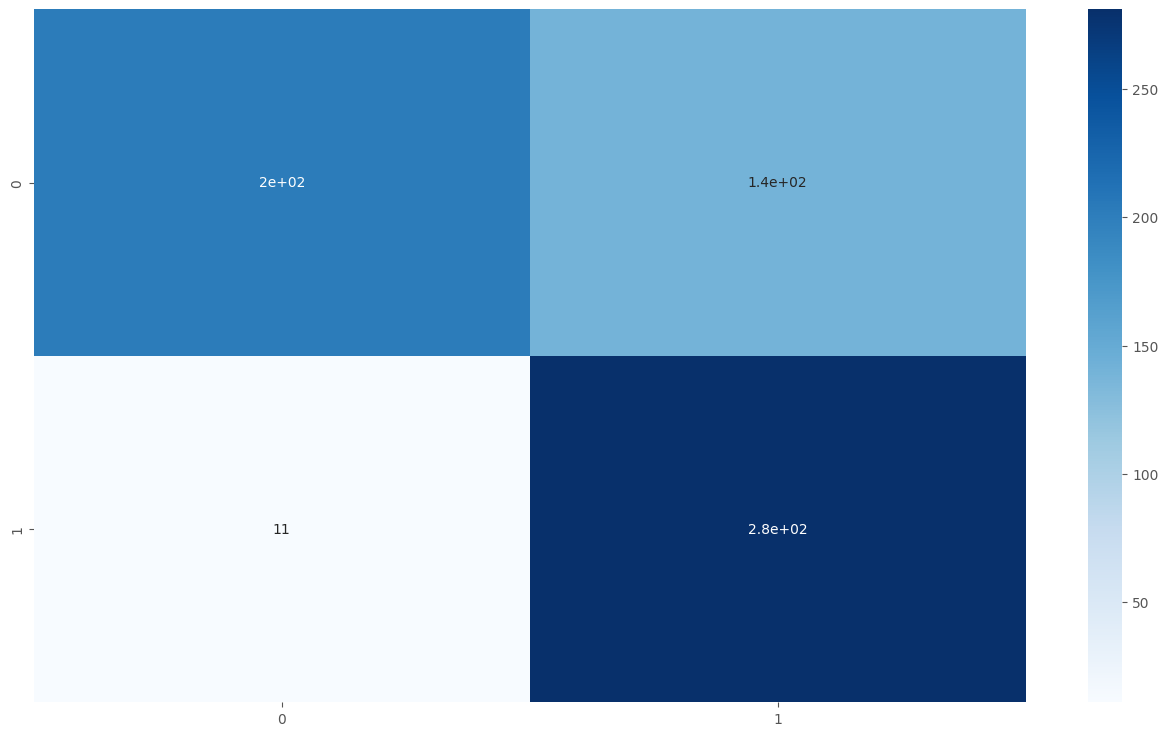

In [33]:
matrizNaive2=confusion_matrix(yTestNaive2,yPredictNaive2)
print(matrizNaive2)
sb.heatmap(matrizNaive2,annot=True,cmap="Blues")

In [34]:
vp = matrizNaive2[0,0]
fp = matrizNaive2[0,1]
fn = matrizNaive2[1,0]
vn = matrizNaive2[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print(f'Verdaderos Positivos =  {vp}')
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print(f'Falsos Positivos =  {fp}')
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print(f'Falsos Negativos = {fn}')
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print(f'Verdaderos Negativos = {vn}')

Verdaderos Positivos =  202
Falsos Positivos =  140
Falsos Negativos = 11
Verdaderos Negativos = 281


In [35]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print(f'Sensibilidad: {sensibilidad}')
print(f'Especificidad: {especificidad}')

Sensibilidad: 0.9483568075117371
Especificidad: 0.667458432304038


# Resumen de métricas

In [37]:
precision_recall_fscore_support(yTestNaive2,yPredictNaive2,average=None)
etiquetas=["yes","no"]
print(classification_report(yTestNaive2,yPredictNaive2,target_names=etiquetas))

              precision    recall  f1-score   support

         yes       0.95      0.59      0.73       342
          no       0.67      0.96      0.79       292

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634



In [38]:
accuracy = accuracy_score(yTestNaive2, yPredictNaive2) # proporción de predicciones correctas del modelo
precision = precision_score(yTestNaive2, yPredictNaive2, average = 'weighted') # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestNaive2, yPredictNaive2, average = 'weighted') # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestNaive2, yPredictNaive2, average = 'weighted') # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(type(f1.item()))

Accuracy: 0.7618296529968455
Precision: 0.8189840542615034
Recall: 0.7618296529968455
F1 Score: 0.7556959608034508
<class 'float'>
